In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
gp = pd.read_csv("./googleplaystore.csv")
gp.shape

(10841, 13)

In [3]:
data = gp.drop_duplicates(subset='App', keep='first')
data.shape

(9660, 13)

In [4]:
data.loc[data['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [5]:
data.loc[data['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [7]:
data = data.drop([10472,9148,4453,4490])
data.shape

(9656, 13)

In [8]:
data = data.reset_index(drop=True)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
c = data['Category']

In [10]:
cnum = pd.get_dummies(c)
cnum.shape

(9656, 33)

In [11]:
cnum

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=1)
new_c = pca.fit_transform(cnum)
new_c.shape

(9656, 1)

In [14]:
new_c = pd.DataFrame(new_c,columns=['category'])

In [15]:
df = data
df['Category'] = new_c
df.shape

(9656, 13)

In [16]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,-0.137037,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,-0.137037,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",-0.137037,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,-0.137037,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,-0.137037,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,-0.137037,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,-0.137037,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,-0.137037,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,-0.137037,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,-0.137037,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [17]:
df.isna().sum()

App                  0
Category             0
Rating            1462
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

In [18]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [19]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

In [20]:
df = df.drop(['Size','Last Updated','Current Ver','Price'],axis=1)
df.shape

(9656, 9)

In [21]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,-0.137037,4.1,159,"10,000+",Free,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,-0.137037,3.9,967,"500,000+",Free,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",-0.137037,4.7,87510,"5,000,000+",Free,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,-0.137037,4.5,215644,"50,000,000+",Free,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,-0.137037,4.3,967,"100,000+",Free,Everyone,Art & Design;Creativity,4.4 and up


In [22]:
install = pd.Series(df['Installs'])

In [23]:
install.value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1030
10,000,000+        937
1,000+             887
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [25]:
new_install = le.fit_transform(install)

In [26]:
new_install

array([ 6, 18, 13, ...,  2,  2,  7], dtype=int64)

In [27]:
list(le.classes_)

['0+',
 '1+',
 '1,000+',
 '1,000,000+',
 '1,000,000,000+',
 '10+',
 '10,000+',
 '10,000,000+',
 '100+',
 '100,000+',
 '100,000,000+',
 '5+',
 '5,000+',
 '5,000,000+',
 '50+',
 '50,000+',
 '50,000,000+',
 '500+',
 '500,000+',
 '500,000,000+']

In [28]:
len(list(le.classes_))

20

In [29]:
new_install = pd.DataFrame(new_install)
new_install.shape

(9656, 1)

In [30]:
df['Installs']=new_install
df.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,-0.137037,4.1,159,6,Free,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,-0.137037,3.9,967,18,Free,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",-0.137037,4.7,87510,13,Free,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,-0.137037,4.5,215644,16,Free,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,-0.137037,4.3,967,9,Free,Everyone,Art & Design;Creativity,4.4 and up


In [31]:
df.shape

(9656, 9)

In [32]:
types = pd.Series(df['Type']) 

In [33]:
types.value_counts()

Free    8901
Paid     755
Name: Type, dtype: int64

In [34]:
new_types = le.fit_transform(types) 

In [35]:
new_types

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
list(le.classes_)

['Free', 'Paid']

In [37]:
df['Type'] = pd.DataFrame(new_types)

In [38]:
df.shape

(9656, 9)

In [39]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,-0.137037,4.1,159,6,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,-0.137037,3.9,967,18,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",-0.137037,4.7,87510,13,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,-0.137037,4.5,215644,16,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,-0.137037,4.3,967,9,0,Everyone,Art & Design;Creativity,4.4 and up


In [40]:
df['Content Rating'].value_counts()

Everyone           7901
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [41]:
contentR = df['Content Rating']

In [42]:
new_contentR = pd.get_dummies(contentR)
new_contentR.head()

,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [43]:
pca = PCA(n_components=1)
new_contentR1 = pca.fit_transform(new_contentR)

In [44]:
df['Content Rating']=pd.DataFrame(new_contentR1)

In [45]:
df.shape

(9656, 9)

In [46]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,-0.137037,4.1,159,6,0,-0.216301,Art & Design,4.0.3 and up
1,Coloring book moana,-0.137037,3.9,967,18,0,-0.216301,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",-0.137037,4.7,87510,13,0,-0.216301,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,-0.137037,4.5,215644,16,0,1.156014,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,-0.137037,4.3,967,9,0,-0.216301,Art & Design;Creativity,4.4 and up


In [47]:
from sklearn.preprocessing import MultiLabelBinarizer

In [48]:
mlb = MultiLabelBinarizer()

In [49]:
g = []
for i in df['Genres']:
    x = i.replace(";",",")
    #print(x.split(','))
    g.append(x.split(','))
g = np.array(g)

In [50]:
x = mlb.fit_transform(g)

In [51]:
len(mlb.classes_)

53

In [52]:
mlb.classes_

array(['Action', 'Action & Adventure', 'Adventure', 'Arcade',
       'Art & Design', 'Auto & Vehicles', 'Beauty', 'Board',
       'Books & Reference', 'Brain Games', 'Business', 'Card', 'Casino',
       'Casual', 'Comics', 'Communication', 'Creativity', 'Dating',
       'Education', 'Educational', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Maps & Navigation', 'Medical',
       'Music', 'Music & Audio', 'Music & Video', 'News & Magazines',
       'Parenting', 'Personalization', 'Photography', 'Pretend Play',
       'Productivity', 'Puzzle', 'Racing', 'Role Playing', 'Shopping',
       'Simulation', 'Social', 'Sports', 'Strategy', 'Tools',
       'Travel & Local', 'Trivia', 'Video Players & Editors', 'Weather',
       'Word'], dtype=object)

In [53]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
pca = PCA(n_components=1)
new_x = pca.fit_transform(x) 

In [55]:
df['Genres'] = pd.DataFrame(new_x)

In [56]:
androidver = pd.get_dummies(df['Android Ver'])

In [57]:
pca = PCA(n_components=1)
new_androidver = pca.fit_transform(androidver)

In [58]:
df['Android Ver'] = pd.DataFrame(new_androidver)
df.shape

(9656, 9)

In [59]:
app = le.fit_transform(df['App'])

In [60]:
len(list(le.classes_))

9656

In [61]:
df['App'] = pd.DataFrame(app)

In [62]:
df.shape

(9656, 9)

In [63]:
df.Reviews.dtype

dtype('O')

In [64]:
df['Reviews'] = df['Reviews'].astype(np.float64)

In [65]:
correlation = df.corr('pearson')

In [66]:
correlation

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Android Ver
App,1.000000,-0.035050,0.027100,0.027377,0.020946,0.016938,0.054544,-0.019103,-0.001004
Category,-0.035050,1.000000,0.005369,-0.045624,-0.011935,0.032627,0.023260,-0.294839,0.025384
Rating,0.027100,0.005369,1.000000,0.055030,0.004476,0.040557,0.028339,-0.073547,0.037934
Reviews,0.027377,-0.045624,0.055030,1.000000,0.040561,-0.033064,0.060831,0.016376,-0.005942
Installs,0.020946,-0.011935,0.004476,0.040561,1.000000,-0.044589,0.024953,0.013303,-0.011091
Type,0.016938,0.032627,0.040557,-0.033064,-0.044589,1.000000,-0.038479,0.017363,-0.029312
Content Rating,0.054544,0.023260,0.028339,0.060831,0.024953,-0.038479,1.000000,-0.116946,0.017974
Genres,-0.019103,-0.294839,-0.073547,0.016376,0.013303,0.017363,-0.116946,1.000000,-0.036949
Android Ver,-0.001004,0.025384,0.037934,-0.005942,-0.011091,-0.029312,0.017974,-0.036949,1.000000


In [67]:
correlation['Installs'].sort_values()

Type             -0.044589
Category         -0.011935
Android Ver      -0.011091
Rating            0.004476
Genres            0.013303
App               0.020946
Content Rating    0.024953
Reviews           0.040561
Installs          1.000000
Name: Installs, dtype: float64

In [68]:
correlation['Rating'].sort_values()

Genres           -0.073547
Installs          0.004476
Category          0.005369
App               0.027100
Content Rating    0.028339
Android Ver       0.037934
Type              0.040557
Reviews           0.055030
Rating            1.000000
Name: Rating, dtype: float64

In [69]:
# x = df['Rating'].values.reshape(-1,1)
# y = df['Installs'].values.reshape(-1,1)


In [70]:
target = df['Installs']

In [71]:
# features1 = df.loc[:,df.columns!='Installs']
# features = features1.loc[:,features1.columns!='App']

In [72]:
# features = pd.concat([df['Category'],df['Rating'],df['Reviews'],df['Type'],df['Content Rating'],df['Genres'],df['Android Ver']],axis=1)
features = pd.concat([df['Category'],df['Rating'],df['Reviews'],df['Type'],df['Content Rating'],df['Genres'],df['Android Ver']],axis=1)

features.head()

,Category,Rating,Reviews,Type,Content Rating,Genres,Android Ver
0,-0.137037,4.1,159.0,0,-0.216301,-0.046966,-0.398970
1,-0.137037,3.9,967.0,0,-0.216301,-0.057090,-0.398970
2,-0.137037,4.7,87510.0,0,-0.216301,-0.046966,-0.398970
3,-0.137037,4.5,215644.0,0,1.156014,-0.046966,-0.137826
4,-0.137037,4.3,967.0,0,-0.216301,-0.051272,-0.192861


In [73]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

In [74]:
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size=0.2)

# KNN implementation

In [75]:
scaler = MinMaxScaler()

In [76]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [77]:
int(np.sqrt(len(xtrain)))

87

In [78]:
classifier = KNeighborsClassifier(n_neighbors=87,metric='minkowski',p=2) 

In [79]:
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=87, p=2,
           weights='uniform')

In [80]:
ypred = classifier.predict(xtest)

In [81]:
ypred

array([3, 8, 3, ..., 6, 3, 8], dtype=int64)

In [82]:
# cm = confusion_matrix(ytest,ypred)
# cm

In [83]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.20082815734989648


# Neural Network implementation

In [84]:
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Shilpa\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [149]:
model = Sequential([
    Dense(32, activation='relu',input_shape=(xtrain[1].shape)),    # input_shape should be given only 1d
    Dense(20, activation='softmax')
])

In [150]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                660       
Total params: 916
Trainable params: 916
Non-trainable params: 0
_________________________________________________________________


In [205]:
adam = keras.optimizers.adam(lr=0.00007)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer = adam,
              metrics = ['accuracy']
             )

In [206]:
history = model.fit(xtrain,ytrain,epochs = 40, verbose = 1)

Epoch 1/40
7724/7724 [==============================] - 3s 383us/step - loss: 1.9383 - acc: 0.3472
Epoch 2/40
7724/7724 [==============================] - 1s 79us/step - loss: 1.9383 - acc: 0.3467
Epoch 3/40
7724/7724 [==============================] - 1s 77us/step - loss: 1.9383 - acc: 0.3470
Epoch 4/40
7724/7724 [==============================] - 1s 79us/step - loss: 1.9383 - acc: 0.3457
Epoch 5/40
7724/7724 [==============================] - 1s 79us/step - loss: 1.9383 - acc: 0.3474
Epoch 6/40
7724/7724 [==============================] - 1s 78us/step - loss: 1.9383 - acc: 0.3474
Epoch 7/40
7724/7724 [==============================] - 1s 78us/step - loss: 1.9383 - acc: 0.3462
Epoch 8/40
7724/7724 [==============================] - 1s 81us/step - loss: 1.9382 - acc: 0.3479
Epoch 9/40
7724/7724 [==============================] - 1s 79us/step - loss: 1.9383 - acc: 0.3465
Epoch 10/40
7724/7724 [==============================] - 1s 78us/step - loss: 1.9382 - acc: 0.3468
Epoch 11/40
7724/7

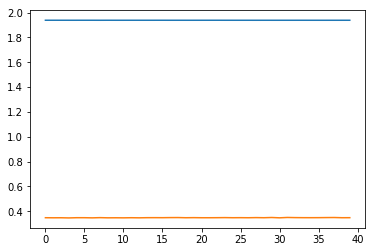

In [207]:
plt.plot(history.epoch,history.history['loss'],   # blue
        history.epoch,history.history['acc'])

In [208]:
# model.save('final_model.sav')

In [209]:
testing = model.evaluate(xtest,ytest,verbose=1)

1932/1932 [==============================] - 1s 470us/step


In [210]:
testing

[1.8881462563145481, 0.3643892338927488]

In [211]:
print(model.metrics_names)

['loss', 'acc']


In [212]:
model.save('partly_trained.h5')
del model

In [213]:
from keras.models import load_model

In [214]:
model = load_model('partly_trained.h5')

In [215]:
# adam = keras.optimizers.adam(lr=0.01)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer = adam,
              metrics = ['accuracy']
             )

In [216]:
history = model.fit(xtrain,ytrain,epochs = 40, verbose = 1)

Epoch 1/40
7724/7724 [==============================] - 3s 370us/step - loss: 1.9387 - acc: 0.3463
Epoch 2/40
7724/7724 [==============================] - 1s 82us/step - loss: 1.9383 - acc: 0.3459
Epoch 3/40
7724/7724 [==============================] - 1s 82us/step - loss: 1.9382 - acc: 0.3477
Epoch 4/40
7724/7724 [==============================] - 1s 87us/step - loss: 1.9382 - acc: 0.3475
Epoch 5/40
7724/7724 [==============================] - 1s 79us/step - loss: 1.9382 - acc: 0.3476
Epoch 6/40
7724/7724 [==============================] - 1s 82us/step - loss: 1.9382 - acc: 0.3485
Epoch 7/40
7724/7724 [==============================] - 1s 79us/step - loss: 1.9383 - acc: 0.3471
Epoch 8/40
7724/7724 [==============================] - 1s 81us/step - loss: 1.9382 - acc: 0.3474
Epoch 9/40
7724/7724 [==============================] - 1s 81us/step - loss: 1.9382 - acc: 0.3475
Epoch 10/40
7724/7724 [==============================] - 1s 80us/step - loss: 1.9382 - acc: 0.3475
Epoch 11/40
7724/7

In [217]:
testing = model.evaluate(xtest,ytest,verbose=1)
testing

1932/1932 [==============================] - 1s 460us/step


[1.8884263342211705, 0.3638716355490635]

In [100]:
# import pickle

In [101]:
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))

In [102]:
# loaded_model = pickle.load(open(filename, 'rb'))